In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from functions import share, to_index

In [2]:
fc = pd.read_csv('./data/processed/agg_firm_credit.csv', index_col=['sector', 'account'])
fc.columns = pd.to_datetime(fc.columns)
hc = pd.read_csv('./data/processed/agg_household_credit.csv', index_col=['sector', 'account'])
hc.columns = pd.to_datetime(hc.columns)
gdp = pd.read_csv('./data/processed/gdp.csv', index_col=['Unnamed: 0'])

In [3]:
fc_total = pd.DataFrame(fc.loc[('nonfin', slice(None)), :].sum().rename('fc'))
fc_total.index = pd.to_datetime(fc_total.index)

fc_total = pd.DataFrame(fc.loc[('nonfin', slice(None)), :].sum().rename('fc'))
fc_total.index = pd.to_datetime(fc_total.index)

In [4]:
gdp = gdp.T
gdp.index = pd.to_datetime(gdp.index)

In [5]:
# Color Pallettes
Chicago20 = '#141F52'	
Chicago30 = '#1F2E7A'	
Chicago45 = '#2E45B8'
Chicago55 = '#475ED1'	
Chicago90 = '#D6DBF5'	
Chicago95 = '#EBEDFA'
LA85 = '#E1DFD0'

### **Firm Credit to GDP**

In [6]:
credit_to_gdp = pd.DataFrame(fc_total.fc / gdp.gdp, columns=['total'])
credit_to_gdp = pd.concat([credit_to_gdp, 
                           (fc.loc[('nonfin', 'bonds'), :] / gdp.gdp).rename('bonds'), 
                           (fc.loc[('nonfin', 'loans'), :] / gdp.gdp).rename('loans'),
                           (fc.loc[('nonfin', 'govloans'), :] / gdp.gdp).rename('govloans')], axis=1)

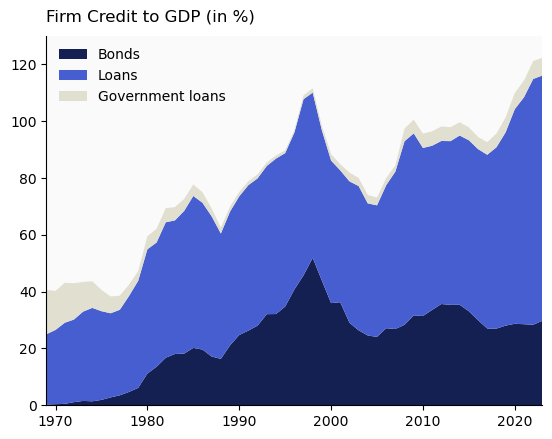

In [73]:
fig, ax = plt.subplots()

ax.stackplot(credit_to_gdp.index, 
             credit_to_gdp.drop(['total'], axis=1).T * 100, 
             labels=['Bonds', 'Loans', 'Government loans'], 
             colors=[Chicago20, Chicago55, LA85])

ax.set_title('Firm Credit to GDP (in %)', loc='left', pad=10)
ax.legend(loc='upper left', framealpha=0)
ax.set_ylim([0, 130])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set(xmargin=0, ymargin=0)
ax.set_facecolor('#FAFAFA')

plt.show()

In [8]:
fig.savefig('./figures/firm_credit_to_gdp.png')

### **Sector Shares in Corporate Credit**

In [9]:
ifc = pd.read_csv('./data/processed/industry_firm_credit.csv', index_col=['Unnamed: 0'])
ifc.index = pd.to_datetime(ifc.index)
ifc_share = ifc.apply(share, axis=1) * 100

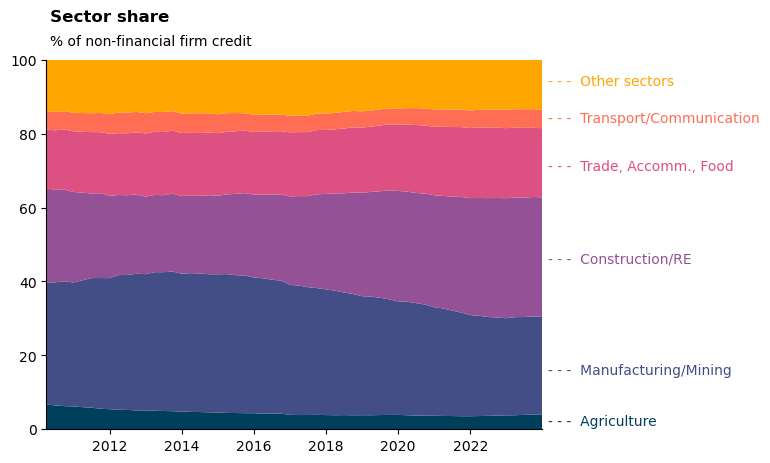

In [122]:
fig, ax = plt.subplots()

# styles
y = [1, 15, 45, 70, 83, 93]
i = ['Agriculture', 'Manufacturing/Mining', 'Construction/RE', 'Trade, Accomm., Food', 'Transport/Communication', 'Other sectors']
c = ['#003f5c', '#444e86', '#955196', '#dd5182', '#ff6e54', '#ffa600']

ax.stackplot(ifc_share.index, 
             ifc_share.T, 
             labels=['Agriculture', 'Manufacturing/Mining', 'Construction/RE', 'Trade, Accomm., Food', 'Transport/Communication', 'Other sectors'],
             colors=c)

#ax.set_title('Sector share (% of nonfinancial firm credit)', loc='left', pad=10)
ax.set_ylim([0, 100])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set(xmargin=0, ymargin=0)
ax.set_facecolor('#FAFAFA')

# Add titles
fig.text(x=0.13, y=0.96, s='Sector share', size='large', weight='semibold') # title
fig.text(x=0.13, y=0.91, s='% of non-financial firm credit', size='medium', weight='medium') # subtitle

# Add labels
for idx in range(6):
    ax.text(x=pd.to_datetime('2024-03-01'), y=y[idx], s='- - -  '+i[idx], color=c[idx])

plt.show()

In [11]:
ifc_annual = ifc.iloc[3::4, :]

In [12]:
ifc_annual.agr.iloc[0]

41225.6

In [14]:
data = ifc_annual.div(gdp['2010':].values)

In [17]:
data = data.apply(to_index) * 100

In [30]:
data.index = pd.to_datetime([str(yr) for yr in range(2010, 2024)])

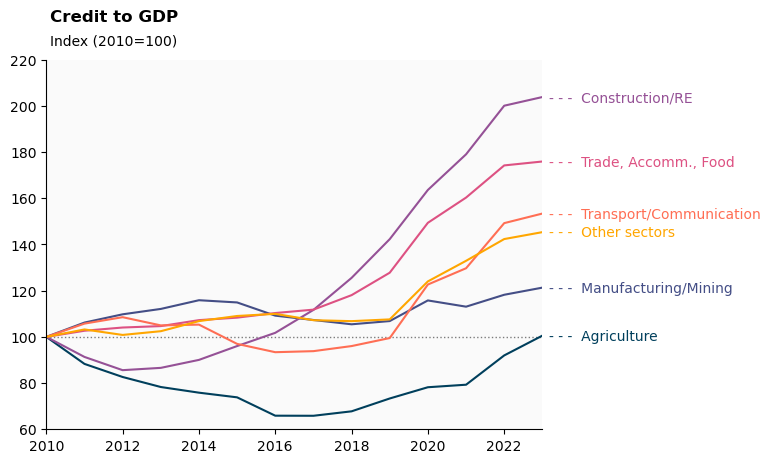

In [121]:
fig, ax = plt.subplots()

# styles
y = [100.530421, 121.316233, 203.824322, 175.919726, 153.383208, 145.339754]
i = ['Agriculture', 'Manufacturing/Mining', 'Construction/RE', 'Trade, Accomm., Food', 'Transport/Communication', 'Other sectors']
c = ['#003f5c', '#444e86', '#955196', '#dd5182', '#ff6e54', '#ffa600']

ax.axhline(100, ls=':', color='k', lw=1, alpha=0.5)
for j in range(6):
    ax.plot(data.iloc[:, j], color=c[j])


#ax.set_title('Credit to GDP (Index 2010=100)', loc='left', pad=10)
ax.set_ylim([60, 220])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set(xmargin=0, ymargin=0)
ax.set_facecolor('#FAFAFA')

# Add titles
fig.text(x=0.13, y=0.96, s='Credit to GDP', size='large', weight='semibold') # title
fig.text(x=0.13, y=0.91, s='Index (2010=100)', size='medium', weight='medium') # subtitle

# Add labels
for idx in range(6):
    ax.text(x=pd.to_datetime('2023-03-01'), y=y[idx]-2, s='- - -  '+i[idx], color=c[idx])

plt.show()

### **Credit Booms**